In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\Valluri Suresh\Downloads\archive (1)\IOT_NETWORK_DATA.csv")

# Configure the visual style for all plots
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Display the first 5 rows to ensure it loaded correctly
df.head()

,packet_size,transmission_time,protocol_type,bandwidth_usage,latency,jitter,packet_loss_rate,device_id,device_type,energy_usage,allocated_bandwidth
0,1226,91.122098,HTTP,15.623114,550.520270,1.955575,0.678984,565,camera,3.070838,6.410492
1,960,33.345611,HTTP,63.094117,222.891645,23.431288,0.432164,321,actuator,2.216078,34.671596
2,1394,18.012294,HTTP,80.794838,86.795792,40.182257,0.377581,410,actuator,6.415588,82.953095
3,1230,95.410847,TCP,59.551855,925.876918,11.281608,1.057459,686,camera,7.121031,28.562144
4,1195,34.216522,TCP,38.698202,427.947049,9.526643,3.684529,231,sensor,5.806726,96.234900


In [8]:
# Check for missing values
print(df.isnull().sum())

# Get summary statistics for numerical columns (latency, energy, etc.)
df.describe()

packet_size            0
transmission_time      0
protocol_type          0
bandwidth_usage        0
latency                0
jitter                 0
packet_loss_rate       0
device_id              0
device_type            0
energy_usage           0
allocated_bandwidth    0
dtype: int64


,packet_size,transmission_time,bandwidth_usage,latency,jitter,packet_loss_rate,device_id,energy_usage,allocated_bandwidth
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,800.572450,50.554847,50.063176,499.645774,50.145572,2.493648,500.197250,5.066294,49.990160
std,403.979732,28.589731,28.810752,288.361894,28.813448,1.443142,289.066088,2.861202,28.867008
min,100.000000,1.000651,0.100223,1.031116,0.000052,0.000026,1.000000,0.100008,0.100254
25%,451.000000,25.654744,25.074256,250.842575,25.185795,1.245759,249.000000,2.582381,24.892694
50%,801.000000,50.691359,50.044703,500.139509,50.292206,2.485168,501.000000,5.075454,50.054873
75%,1152.000000,75.280858,75.041310,748.662160,75.075935,3.744015,751.000000,7.547101,74.928710
max,1499.000000,99.999212,99.999461,999.986953,99.999831,4.999947,1000.000000,9.999929,99.997790


### 1. How many devices of each type are in the network?

C:\Users\Valluri Suresh\AppData\Local\Temp\ipykernel_19704\3930609991.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='device_type', palette='Set2')


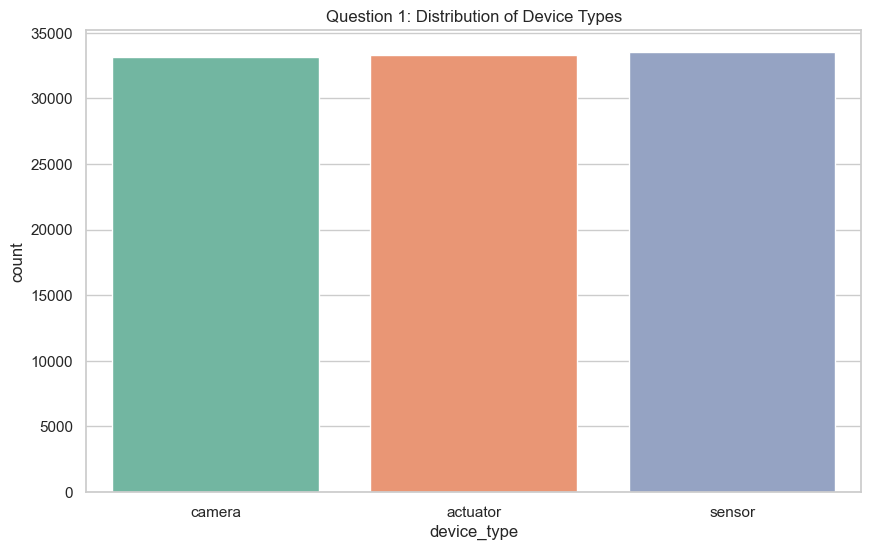

In [9]:
sns.countplot(data=df, x='device_type', palette='Set2')
plt.title('Question 1: Distribution of Device Types')
plt.show()

### 2. Which protocol is used most often?

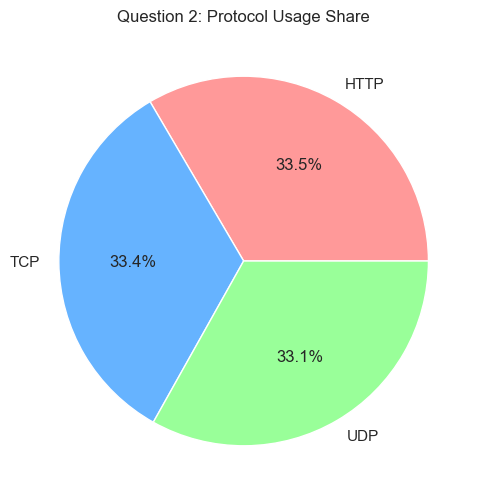

In [10]:
df['protocol_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Question 2: Protocol Usage Share')
plt.ylabel('')
plt.show()

### 3. Which device type consumes the most energy on average?

C:\Users\Valluri Suresh\AppData\Local\Temp\ipykernel_19704\4048863107.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='device_type', y='energy_usage', ci=None)


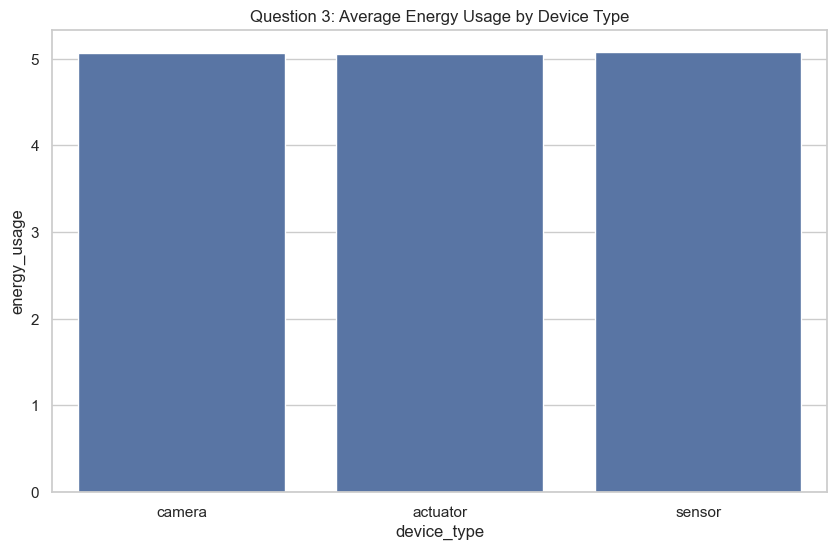

In [11]:
sns.barplot(data=df, x='device_type', y='energy_usage', ci=None)
plt.title('Question 3: Average Energy Usage by Device Type')
plt.show()

### 4. Is there a relationship between Latency and Jitter?

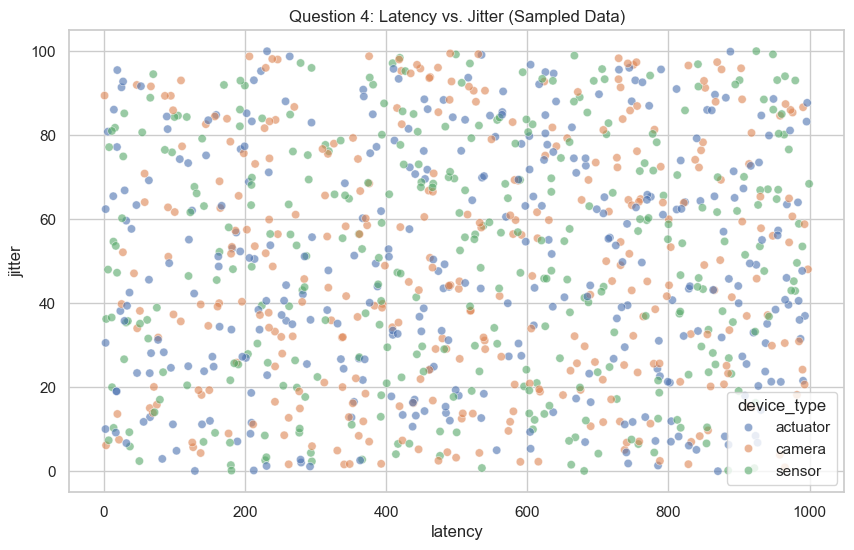

In [12]:
sns.scatterplot(data=df.sample(1000), x='latency', y='jitter', hue='device_type', alpha=0.6)
plt.title('Question 4: Latency vs. Jitter (Sampled Data)')
plt.show()

### 5.What is the distribution of Packet Loss across the network?

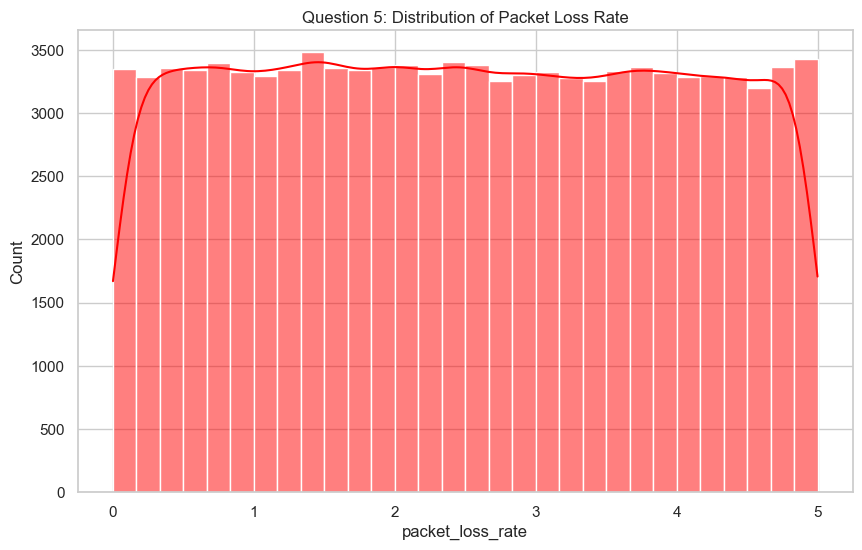

In [13]:
sns.histplot(df['packet_loss_rate'], bins=30, kde=True, color='red')
plt.title('Question 5: Distribution of Packet Loss Rate')
plt.show()

### 6. How does Transmission Time vary by Protocol?

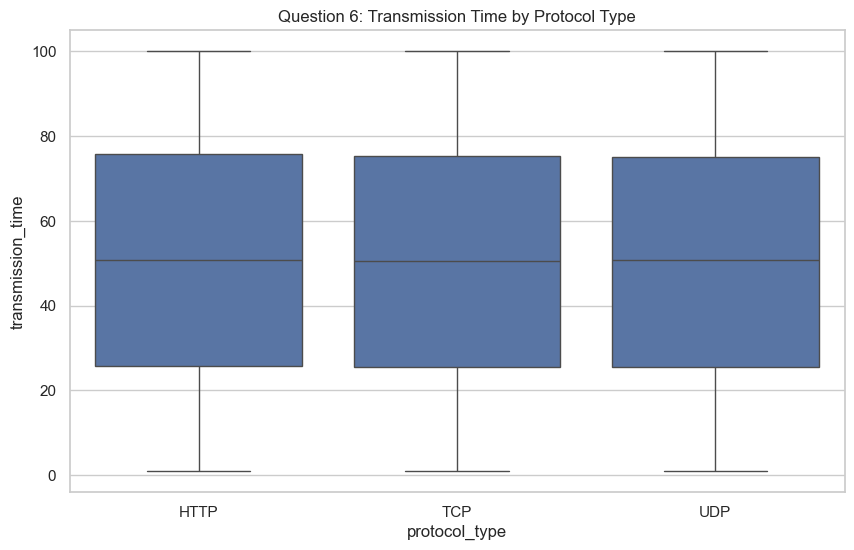

In [14]:
sns.boxplot(data=df, x='protocol_type', y='transmission_time')
plt.title('Question 6: Transmission Time by Protocol Type')
plt.show()

### 7 . What is the typical Packet Size for different devices?

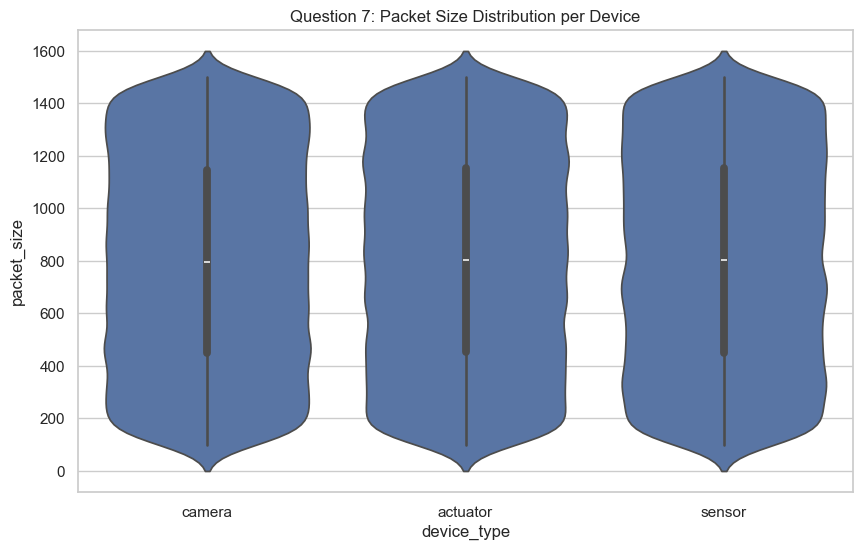

In [15]:
sns.violinplot(data=df, x='device_type', y='packet_size')
plt.title('Question 7: Packet Size Distribution per Device')
plt.show()

### 8. How much bandwidth is being wasted (Allocated vs. Used)?

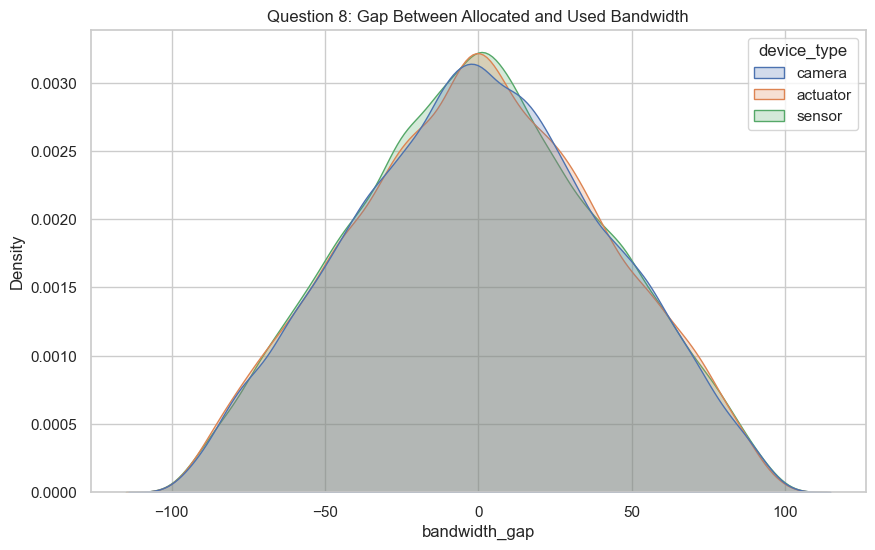

In [16]:
df['bandwidth_gap'] = df['allocated_bandwidth'] - df['bandwidth_usage']
sns.kdeplot(data=df, x='bandwidth_gap', hue='device_type', fill=True)
plt.title('Question 8: Gap Between Allocated and Used Bandwidth')
plt.show()

### 9. Does high Latency lead to higher Packet Loss?

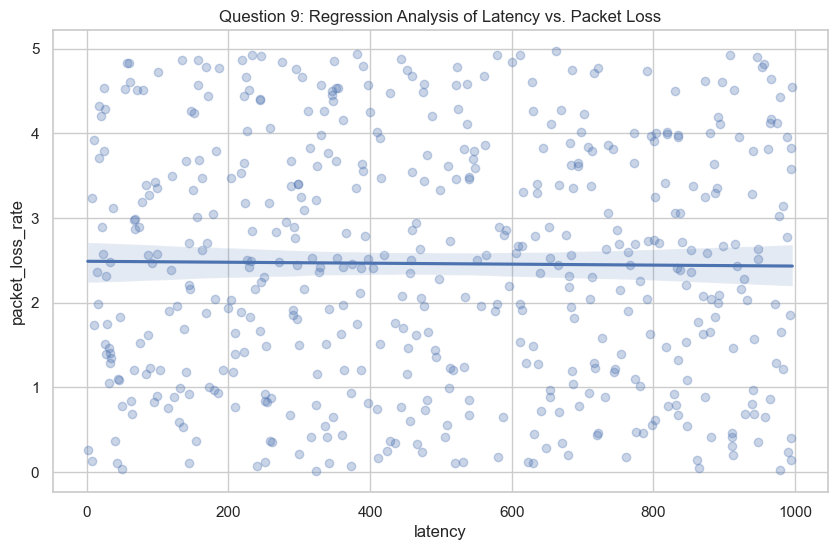

In [17]:
sns.regplot(data=df.sample(500), x='latency', y='packet_loss_rate', scatter_kws={'alpha':0.3})
plt.title('Question 9: Regression Analysis of Latency vs. Packet Loss')
plt.show()

### 10. Which protocol/device combination is the most energy efficient?

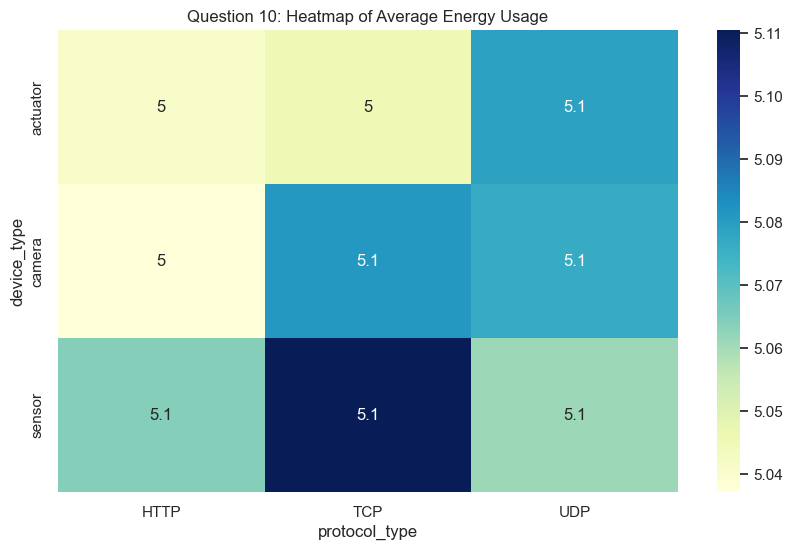

In [18]:
pivot_table = df.pivot_table(index='device_type', columns='protocol_type', values='energy_usage', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title('Question 10: Heatmap of Average Energy Usage')
plt.show()